<a href="https://www.kaggle.com/code/vimukthi1997/gaussian-distributions?scriptVersionId=171329457" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports

In [1]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import numpy as np
import scipy 

# Normal Distributions

- Also known as guassian distribution,  $\mathcal{N}(\mu, \sigma^{2})$ is commonly used to represent the parameters of the distriubtion.

- The parameter $\mu$ represents the **mean** or **expected value** of the distribution, while the parameter $\sigma$ is **standard deviation**

- $\sigma^{2}$ is called the **variance** of the distribution

For a given real valued random variable `x`, the probability desnsity function is defined as:

$$p(x; \mu, \sigma^{2}) = \frac{1}{\sigma \sqrt{2 \pi}} exp({\frac{-1}{2}(\frac {x - \mu}{\sigma})^{2}}) \tag {1}$$

# Univariate Normal Distribution

- When there is an only one random variable, the distribution is called univariate normal distribution

In [2]:
def get_univariate_normal(x, mu, sigma):
    """Generates a PDF for a Univariate Normal Distribution.

    Args:
        x: Vector of values sorted in ascending order
        mu: Mean of the Gaussian
        sigma: Standard Deviation of the Gaussian
    Returns:
        A PDF
    """
    return 1 / (sigma * np.sqrt(2 * np.pi)) * (np.exp(-(x - mu)**2 / (2 * sigma**2)))


# Mean of the distribution
mu = 0.0

# Standard deviation(SD for short)
sigma = 1.0

# Generate a linspace for a random variable x
num_samples = 100
x = np.linspace(-3*sigma + mu, 3*sigma + mu, num=num_samples)

# Plot the value against the PDF
fig = go.Figure(
    data=go.Scatter(
        x=x,
        y=get_univariate_normal(x, mu=mu, sigma=sigma),
        line=dict(width=3,color="black"),
        fill="tonexty",
        fillcolor="skyblue",
    )
)

fig.add_annotation(x=mu, y=-0.001, text="Mean",showarrow=True, arrowhead=2)
fig.add_vline(x=mu, line_width=3, line_dash="dash", line_color="green")
fig.update_layout(
    {
        "title": {
            'text': f"Univariate Gaussian Distribution <br> μ: {mu}, σ\u00b2: {sigma**2}",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=14)
        },
        "xaxis": {"title": "X"},
        "yaxis": {"title": "Probability Density"},
        "margin": dict(l=0, r=0, b=0, t=50)
    }
)

fig.show()

 - Shifting the distribution: changing the $\mu$
 - Changing the shape of the distribution: changing the $\sigma$

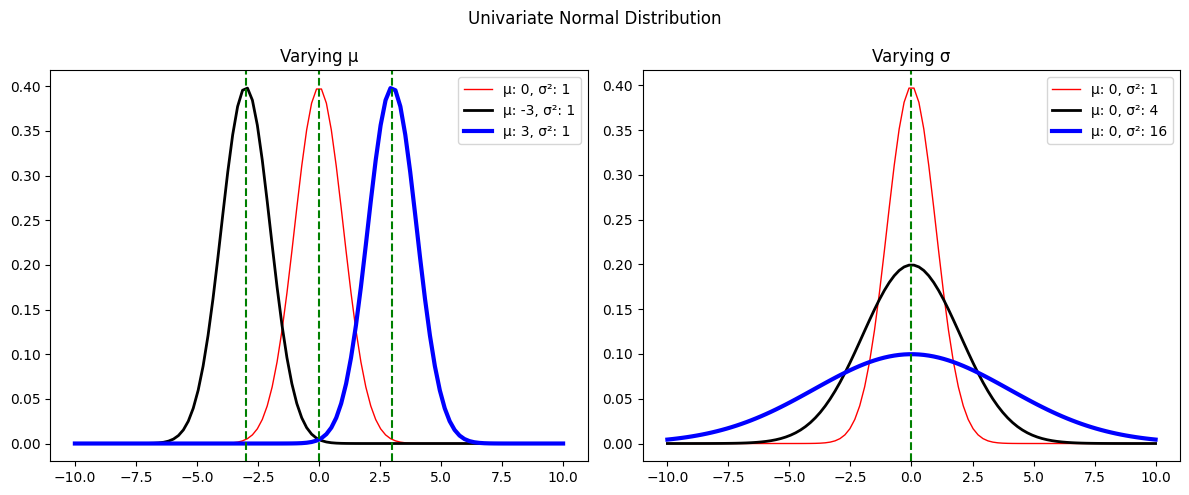

In [3]:
# Random variable x
x = np.linspace(-10.0, 10.0, 100)

# Combination of mu and sigma. The first value
# of any tuple represents mu while the second value
# represents sigma here.
mu_sigma_combos = [
    [(0, 1), (-3, 1), (3, 1)],
    [(0, 1), (0, 2), (0, 4)],
]

# Line colors and widths to be used
# for different combinations
colors = ["red", "black", "blue"]
widths = [1, 2, 3]
subtitles = ["Varying μ", "Varying σ"]

# Plot
_, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12, 5), tight_layout=True)
for i, elem in enumerate(mu_sigma_combos):
    legend = []
    mus = set()
    for j, comb in enumerate(elem):
        mu, sigma = comb
        mus.add(mu)
        legend.append(f"μ: {mu}, σ\u00b2: {sigma**2}")
        ax[i].plot(x, get_univariate_normal(x, mu, sigma), linewidth=widths[j], c=colors[j])
        ax[i].tick_params(labelbottom=True)
    
    ax[i].set_title(subtitles[i])
    ax[i].legend(legend, loc="upper right")
    
    for mu in mus:
        ax[i].axvline(x=mu, color="green", linestyle="--")

plt.suptitle("Univariate Normal Distribution")
plt.show()

# Multivariate Normal Distribution

- In here there are multiple variables to be considered: usually input is a **vector**

- The multivariate normal distribution has associated parameters $\mu$ representing **mean vector** and $\Sigma$ representing the **covariance matrix**.

- The probability density function in this case is:

$$p(x; \mu, \Sigma) = \frac{1}{(2\pi)^{d/2} \ \vert{\Sigma}\vert^{1/2}} \ exp \ (\frac{-1}{2}(x - \mu)^T \Sigma^{-1}(x - \mu))  \tag{2}$$

- Random variable: $X = [x_{1}, \ x_{2}, \ x_{3}...]$ is a **D**-dimensional vector

- Mean $\mu = [\mu_{1}, \ \mu_{2}, \ \mu_{3}...]$ is a **D**-dimensional vector

- Covariance Matrix $\sigma$ **D x D**-dimensional matrix

Let's plot the **Bivariate Normal Distribution** (vector **X** is 2-dimensional)

In [4]:
def get_multivariate_normal(
    mu,
    cov,
    sample=True,
    sample_size=None,
    seed=None,
    gen_pdf=False,
    pos=None
):
    """Builds a multivariate Gaussian Distribution.
    
    Given the mean vector and the covariance matrix,
    this function builds a multivariate Gaussian
    distribution. You can sample from this distribution,
    and generate probability density for given positions.
    
    Args:
        mu: Mean vector representing the mean values for
            the random variables
        cov: Covariance Matrix
        sample (bool): If sampling is required
        sample_size: Only applicable if sampling is required.
            Number of samples to extract from the distribution
        seed: Random seed to be passed for distribution, and sampling
        gen_pdf(bool): Whether to generate probability density
        pos: Applicable only if density is generated. Values for which
            density is generated
    Returns:
        1. A Multivariate distribution
        2. Sampled data if `sample` is set to True else `None`
        3. Probability Density if `gen_pdf` is set to True else `None`
    """
    
    # 1. Multivariate distribution from given mu and cov
    dist = scipy.stats.multivariate_normal(mean=mu, cov=cov, seed=seed)
    
    # 2. If sampling is required
    if sample:
        samples = dist.rvs(size=sample_size, random_state=seed)
    else:
        samples = None
    
    # 3. If density is required
    if gen_pdf:
        if pos is None:
            raise ValueError("`pos` is required for generating density!")
        else:
            pdf = dist.pdf(pos)
    else:
        pdf = None
        
    return dist, samples, pdf



# Mean of the random variables X1 and X2
mu_x1, mu_x2 = 0, 0

# Standard deviation for the random variables X1 and X2
sigma_x1, sigma_x2 = 1, 1

# Positions for which probability density is
# to be generated
x1, x2 = np.mgrid[
    (-3.0 * sigma_x1 + mu_x1):(3.0 * sigma_x1 + mu_x1): 0.1,
    (-3.0 * sigma_x2 + mu_x2):(3.0 * sigma_x2 + mu_x2): 0.1
]
pos = np.dstack((x1, x2))

# Mean vector
mu = [mu_x1, mu_x2]

# Covariance between the two random variables
cov_x1x2 = 0

# Covariance Matrix for our bivariate Gaussian distribution
cov = [[sigma_x1**2, cov_x1x2], [cov_x1x2, sigma_x2**2]]

seed =42

# Build distribution generate density
sample = get_multivariate_normal(
        mu=mu,
        cov=cov,
        sample=False,
        seed=seed,
        gen_pdf=True,
        pos=pos
    )


# Plot the bivariate normal density
fig = go.Figure(
    go.Surface(
        z=sample[2],
        x=x1,
        y=x2,
        colorscale='Viridis',
        showscale=False
    )
)
fig.update_layout(
    {
        "title": dict(
            text="Bivariate Distribution",
            y=0.95,
            x=0.5,
            xanchor="center",
            yanchor="top",
            font=dict(size=12)
        ), 
        "scene":dict(
            xaxis=dict(title='x1'),
            yaxis=dict(title='x2'),
            zaxis=dict(title='Probability density')
        ),
        "xaxis": dict(title="Values"),
        "yaxis": dict(title="Probability Density"),
    }
)
fig.show()

 When you hover over the density, you will see black lines generating two univariate normals, one for x1 and another for x2

# Covariance Matrix

- The covariance is the expected value of the product of random variables's deviations from their individual expected values.

- Let's consider $X$ and $Y$ are two random variables, then Covariance of $X$ and $Y$ is defined as:

$$Cov(X, Y) = E[(X - E(X))(Y - E(Y))] = E[XY] - E[X]E[Y]  \tag{3}$$

Covariance says many things:

1. gives a sense of how much two random variables as well as their scales are linearly related

2. Captures only **linear** dependence and gives no information about other kind of relationships

3. If the sign of the covariance is positive, then both variables tend to take on relatively high values simultaneously. If the sign of the covariance is negative, then one variable tends to take on a relatively high value at the times that the other takes on a relatively low value and vice versa.

4. If two variables X and Y are **independent**, then $Cov(X, Y)= 0$
 but the reverse isn’t true. Why? Because covariance doesn’t take into account **non-linear relationships**


If $X$ is a N-dimensional vector i.e. $X = [x_{1}, \ x_{2}, \ x_{3}...x_{n}]$, the covariance matrix is a N X N matrix defined as:

$$\begin{bmatrix}
Cov(x_{1}x_{1}) & \cdots & Cov(x_{1}x_{n}) \\
\vdots & \ddots & \vdots \\
Cov(x_{n}x_{1}) & \cdots & Cov(x_{n}x_{n})
\end{bmatrix}$$

Each entry $(i, j)$ in this matrix defines the covariance of two random variables of the vector. Also:

$$Cov(x_{i}x_{j}) = Var(x_{i}) \ \ \ \{ i=j\}$$

Let’s take an example to showcase zero covariance, positive covariance, and negative covariance between two random variables x1 and x2.

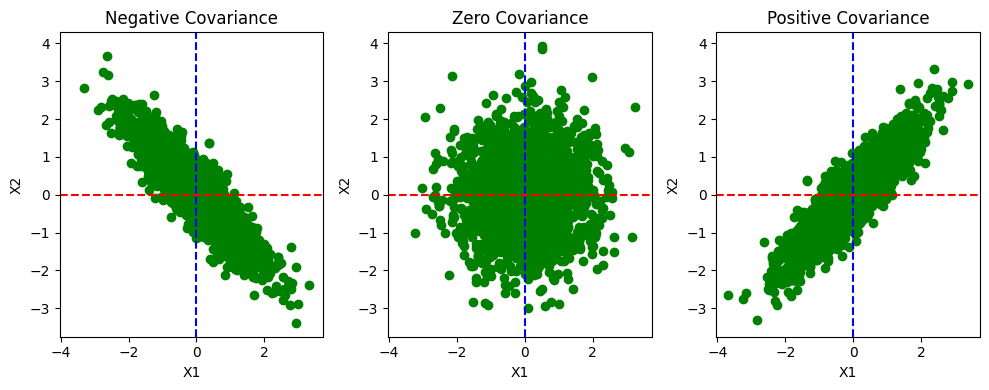

In [5]:
# Mean of the random variables X1 and X2
mu_x1, mu_x2 = 0, 0

# Standard deviation of the random variables X1 and X2
sigma_x1, sigma_x2 = 1, 1

# Number of samples to extract
sample_size = 2000

# Positions for which probability density is
# to be generated
x1, x2 = np.mgrid[
    (-3.0 * sigma_x1 + mu_x1):(3.0 * sigma_x1 + mu_x1): 0.1,
    (-3.0 * sigma_x2 + mu_x2):(3.0 * sigma_x2 + mu_x2): 0.1
]
pos = np.dstack((x1, x2))

# Mean vector
mu = [mu_x1, mu_x2]


# Case 1: Zero Covariance
cov_x1x2 = 0
zero_cov = [[sigma_x1**2, cov_x1x2], [cov_x1x2, sigma_x2**2]]
# Build distribution, sample and generate density
zero_cov_res = get_multivariate_normal(
        mu=mu,
        cov=zero_cov,
        sample=True,
        sample_size=sample_size,
        seed=seed,
        gen_pdf=True,
        pos=pos
    )


# Case 2: Positive Covarinace
cov_x1x2 = 0.9
pos_cov = [[sigma_x1**2, cov_x1x2], [cov_x1x2, sigma_x2**2]]
# Build distribution, sample and generate density
pos_cov_res = get_multivariate_normal(
        mu=mu,
        cov=pos_cov,
        sample=True,
        sample_size=sample_size,
        seed=seed,
        gen_pdf=True,
        pos=pos
    )


# Case 3: Negative Covarinace
cov_x1x2 = -0.9
neg_cov = [[sigma_x1**2, cov_x1x2], [cov_x1x2, sigma_x2**2]]
# Build distribution, sample and generate density
neg_cov_res = get_multivariate_normal(
        mu=mu,
        cov=neg_cov,
        sample=True,
        sample_size=sample_size,
        seed=seed,
        gen_pdf=True,
        pos=pos
    )

# Plot the covariances
_, ax = plt.subplots(1, 3, figsize=(10, 4), sharex=True, sharey=True)
samples = [neg_cov_res[1], zero_cov_res[1], pos_cov_res[1]]
titles = ["Negative Covariance", "Zero Covariance", "Positive Covariance"]

for i in range(3):
    ax[i].scatter(samples[i][:, 0], samples[i][:, 1], c="green")
    ax[i].set_xlabel("X1")
    ax[i].set_ylabel("X2")
    ax[i].set_title(titles[i])
    ax[i].tick_params(labelleft=True)
    ax[i].axvline(x=mu[0], color="blue", linestyle="--")
    ax[i].axhline(y=mu[1], color="red", linestyle="--")

plt.tight_layout()
plt.show()

- The blue and red lines in the above plot represent the mean values of x1 and x2 respectively. 

Let’s visualize how the probability density surface changes with the covariance.
- Rotate the plot to see the differenc of each visualization!

In [6]:
fig = go.Figure(
    go.Surface(
        z=neg_cov_res[2],
        x=x1,
        y=x2,
        colorscale='Hot',
        showscale=False
    )
)
fig.update_layout(
    {
        "title": dict(
            text=f"Bivariate Distribution<br>cov_x1x2: {neg_cov[0][1]:.2f}",
            y=0.95,
            x=0.5,
            xanchor="center",
            yanchor="top",
            font=dict(size=12)
        ), 
        "scene":dict(
            xaxis=dict(title='X1'),
            yaxis=dict(title='X2'),
            zaxis=dict(title='Probability density')
        ),
        "xaxis": dict(title="Values"),
        "yaxis": dict(title="Probability Density"),
    }
)

# fig.write_html(os.path.join(SAVE_PLOT_DIR, "bivariate_negative_covariance_density.html"))
# fig.write_image(os.path.join(SAVE_PLOT_DIR, "bivariate_negative_covariance_density.png"))
fig.show()

In [7]:
fig = go.Figure(
    go.Surface(
        z=zero_cov_res[2],
        x=x1,
        y=x2,
        colorscale='Viridis',
        showscale=False
    )
)
fig.update_layout(
    {
        "title": dict(
            text=f"Bivariate Distribution<br>cov_x1x2: {zero_cov[0][1]:.2f}",
            y=0.95,
            x=0.5,
            xanchor="center",
            yanchor="top",
            font=dict(size=12)
        ), 
        "scene":dict(
            xaxis=dict(title='X1'),
            yaxis=dict(title='X2'),
            zaxis=dict(title='Probability density')
        ),
        "xaxis": dict(title="Values"),
        "yaxis": dict(title="Probability Density"),
    }
)
# fig.write_html(os.path.join(SAVE_PLOT_DIR, "bivariate_zero_covariance_density.html"))
# fig.write_image(os.path.join(SAVE_PLOT_DIR, "bivariate_zero_covariance_density.png"))
fig.show()

In [8]:
fig = go.Figure(
    go.Surface(
        z=pos_cov_res[2],
        x=x1,
        y=x2,
        showscale=False
    )
)
fig.update_layout(
    {
        "title": dict(
            text=f"Bivariate Distribution<br>cov_x1x2: {pos_cov[0][1]:.2f}",
            y=0.95,
            x=0.5,
            xanchor="center",
            yanchor="top",
            font=dict(size=12)
        ), 
        "scene":dict(
            xaxis=dict(title='X1'),
            yaxis=dict(title='X2'),
            zaxis=dict(title='Probability density')
        ),
        "xaxis": dict(title="Values"),
        "yaxis": dict(title="Probability Density"),
    }
)
# fig.write_html(os.path.join(SAVE_PLOT_DIR, "bivariate_positive_covariance_density.html"))
# fig.write_image(os.path.join(SAVE_PLOT_DIR, "bivariate_positive_covariance_density.png"))
fig.show()

A few things to note in the above surface plots:

1. The plot with zero covariance is circular in every direction.
2. The plots with negative and positive covariances are more flattened on the 45-degree line, and are somewhat in a perpendicular direction to that line visually.


# Isotropic Gaussian

Consider how the number of parameters in the Gaussian grows as the number of dimension grows: 
$$\mathcal{N}(\mu,\,\Sigma)$$

where $\mu$ is the mean and $\sigma$ is the covariance matrix.
- $\mu$ has a linear growth
- $\sigma$ has a **quadratic growth**

Since quadratic growth can be very computationally expensive, so $\sigma$ is often restricted as $\Sigma = \sigma^{2}I$ where $\sigma^{2}I$ is a scalar variance multiplied by an identiy matrix.

- Hence this results in $\sigma$ where all dimensions are independent and variance of each dimension is the same.
- Hence, the Guassian will be **circular / spherical**.

An isotropic Gaussian is one where the covariance matrix $\sigma$ can be represented in this form:

$$\Sigma = \sigma^2 I  \tag{4}$$

1. $I$ is identity matrix
2. $\sigma^2$ is the scaler variance

In [ ]:
from plotly.subplots import make_subplots

# Mean of the random variables X1 and X2
mu_x1, mu_x2 = 0, 0

# Standard deviation of the random variables X1 and X2
# Remember the std. is going to be the same
# along all the dimensions.
sigma_x1 = sigma_x2 = 2

# Number of samples to extract
sample_size = 5000

# Positions for which probability density is
# to be generated
x1, x2 = np.mgrid[
    (-3.0 * sigma_x1 + mu_x1):(3.0 * sigma_x1 + mu_x1): 0.1,
    (-3.0 * sigma_x2 + mu_x2):(3.0 * sigma_x2 + mu_x2): 0.1
]
pos = np.dstack((x1, x2))

# Mean vector
mu = [mu_x1, mu_x2]


# Because the covariance matrix of an multivaraite isotropic
# gaussian is a diagonal matrix, hence the covariance for 
# the dimension will be zero.
cov_x1x2 = 0
cov = [[sigma_x1**2, cov_x1x2], [cov_x1x2, sigma_x2**2]]


isotropic_gaussian = get_multivariate_normal(
                        mu=mu,
                        cov=cov,
                        sample=True,
                        sample_size=sample_size,
                        seed=seed,
                        gen_pdf=True,
                        pos=pos
                    )

fig = make_subplots(
    rows=1, cols=2,
    shared_yaxes=False,
    shared_xaxes=False,
    specs=[[{'type': 'scatter'}, {'type': 'surface'}]],
    subplot_titles=(
        "Covariance x1_x2 = 0.0",
        f"mu_x1: {mu_x1} sigma_x1: {sigma_x1**2} <br>mu_x2: {mu_x2} sigma_x2: {sigma_x2**2}"
    )
)


fig.add_trace(
    go.Scatter(
        x=isotropic_gaussian[1][:, 0],
        y=isotropic_gaussian[1][:, 1],
        mode='markers',
        marker=dict(size=5, color="green"),
    ),
    row=1, col=1
)

fig.add_trace(
    go.Surface(
        z=isotropic_gaussian[2],
        x=x1,
        y=x2,
        colorscale='RdBu',
        showscale=False
    ),
    row=1, col=2
)

fig.update_layout(
    {
        "scene":dict(
            xaxis=dict(title='X1'),
            yaxis=dict(title='X2'),
            zaxis=dict(title='Probability density')
        ),
        "xaxis": {"title": "X1"},
        "yaxis": {"title": "X2"},
        "title": {"text": "Isotropic Gaussian", "x":0.5, "font":dict(size=20)}
    }
)

# fig.write_html(os.path.join(SAVE_PLOT_DIR, "isotropic_gaussian.html"))
# fig.write_image(os.path.join(SAVE_PLOT_DIR, "isotropic_gaussian.png"))
fig.show()